In [2]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as inputData
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [4]:
data = inputData.read_data_sets('data', one_hot=True)

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz


In [19]:
def plotNumbers(imset, valset, dimen):
    fig, axis = plt.subplots(dimen[0],dimen[1])

    for pos, sub in enumerate(axis.flat):
        sub.imshow(imset[pos].reshape((28,28)))
        sub.set_xticks([])
        sub.set_yticks([])
        sub.set_xlabel('pred:%r' %valset[pos])
    plt.show()

In [25]:
num_of_epochs=20
batch_size = 100
accu_list = []
epoch_size = int(len(data.train.labels)/batch_size)
drop_rate_train_val = 0.75
drop_rate_test_val = 1.0

L1=200
L2=100
L3=60
L4=30
num_of_inputs=784
num_of_outputs=10

X = tf.placeholder(tf.float32, shape=[None, num_of_inputs])
Y_ori = tf.placeholder(tf.float32, shape=[None, num_of_outputs])
drop_rate = tf.placeholder(tf.float32)

W1 = tf.Variable(initial_value=tf.truncated_normal([num_of_inputs, L1], stddev=0.1))
W2 = tf.Variable(initial_value=tf.truncated_normal([L1, L2], stddev=0.1))
W3 = tf.Variable(initial_value=tf.truncated_normal([L2, L3], stddev=0.1))
W4 = tf.Variable(initial_value=tf.truncated_normal([L3, L4], stddev=0.1))
W5 = tf.Variable(initial_value=tf.truncated_normal([L4, num_of_outputs], stddev=0.1))

b1 = tf.Variable(initial_value=tf.ones(L1)/10)
b2 = tf.Variable(initial_value=tf.ones(L2)/10)
b3 = tf.Variable(initial_value=tf.ones(L3)/10)
b4 = tf.Variable(initial_value=tf.ones(L4)/10)
b5 = tf.Variable(initial_value=tf.zeros(num_of_outputs))

lg1 = tf.matmul(X, W1) + b1
Y1 = tf.nn.relu(lg1)
Y1d = tf.nn.dropout(Y1, keep_prob=drop_rate)

lg2 = tf.matmul(Y1d, W2) + b2
Y2 = tf.nn.relu(lg2)
Y2d = tf.nn.dropout(Y2, keep_prob=drop_rate)

lg3 = tf.matmul(Y2d, W3) + b3
Y3 = tf.nn.relu(lg3)
Y3d = tf.nn.dropout(Y3, keep_prob=drop_rate)

lg4 = tf.matmul(Y3d, W4) + b4
Y4 = tf.nn.relu(lg4)
Y4d = tf.nn.dropout(Y4, keep_prob=drop_rate)

lg5 = tf.matmul(Y4d, W5) + b5
Y_pred = tf.nn.softmax(lg5)

cros_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=lg5, labels=Y_ori)
cost = tf.reduce_mean(cros_entropy)

optimizer = tf.train.AdamOptimizer(0.003)
trainer = optimizer.minimize(cost)

correct_prediction = tf.equal(tf.argmax(Y_pred, axis=1), tf.argmax(Y_ori, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for val in range(epoch_size*num_of_epochs):
    train_batch_x, train_batch_y = data.train.next_batch(batch_size)
    sess.run(trainer, feed_dict={X: train_batch_x, Y_ori: train_batch_y, drop_rate: drop_rate_train_val})

    if (val/epoch_size)%5==0:
        accu_list.append(sess.run(accuracy, feed_dict={X: data.test.images, Y_ori: data.test.labels, drop_rate: 1}))

print(accu_list)

[0.1555, 0.9698, 0.9744, 0.9776]


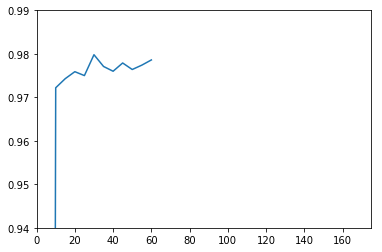

In [21]:
xVal = np.arange(5,num_of_epochs+5,5)
plt.plot(xVal, accu_list[:])
plt.axis([0,175,0.94,0.99])
plt.show()

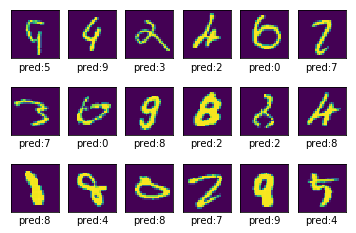

200

In [22]:
prediction = tf.argmax(Y_pred, axis=1)

predict_bool = sess.run(correct_prediction, feed_dict={X: data.test.images, Y_ori: data.test.labels, drop_rate: 1})
predict_bool_inv = [not val for val in predict_bool]
failed_images = data.test.images[predict_bool_inv]

failed_pred = sess.run(prediction, feed_dict={X:failed_images, drop_rate: 1})

plotNumbers(failed_images[0:18], failed_pred[0:18], dimen=(3,6))
len(failed_images)

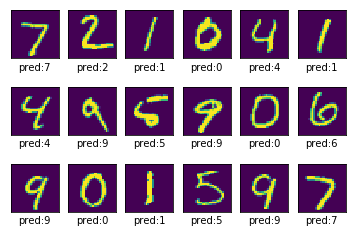

In [23]:
successful_images = data.test.images[predict_bool]
successful_pred = sess.run(prediction, feed_dict={X:successful_images, drop_rate: 1})

plotNumbers(successful_images[0:18], successful_pred[0:18], dimen=(3,6))

In [24]:
test_pred = sess.run(prediction, feed_dict={X: data.test.images, drop_rate: 1})
test_true = data.test.labels.argmax(axis=1)

confu_matri = confusion_matrix(test_true, test_pred)
print(confu_matri)

[[ 969    0    1    0    0    1    4    1    3    1]
 [   0 1124    2    2    0    0    1    1    5    0]
 [   0    0 1014    3    0    0    2    7    6    0]
 [   1    0    2  994    0    7    0    4    2    0]
 [   0    0    2    0  961    0    4    0    4   11]
 [   3    0    0    2    1  872    3    1    7    3]
 [   3    2    0    0    3    6  941    0    2    1]
 [   1    2    6    0    0    0    0 1012    5    2]
 [   1    1    4    3    3    9    4    2  945    2]
 [   1    2    1    7   10    3    0    4   13  968]]
